<a href="https://colab.research.google.com/github/oluke/nucleotide-identifier/blob/main/code/nucleotide_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyek UAS Biosistematika**

**Ketua Kelompok: Lukman**

**Anggota Kelompok: Tiara Dinda Hapsari, Abdul Malik, dan Ester Frescilla Simbolon.**

**Kelas: 3A - SIK**

**Universitas: Universitas Pendidikan Indonesia**

**Dosen Pengampu: Ishak Ariawan, S.Pd., M.Kom.**

## Nucleotide Sequence Mengguakan Machine Learning

Dalam buku notebook ini, kami akan menerapkan model klasifikasi yang dapat memprediksi fungsi gen berdasarkan urutan Nucleotide. Data Nucleotide diperoleh dari laman [NCBI](https://ncbi.nlm.nih.gov/)

In [7]:
#import semua library dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import data-data yang akan diklasifikasikan
Dalam penelitian ini ada tiga kelas mamalia laut berdasarkan jenis spesies yang akan diklasifikasikan, yaitu:
1. Delphinus capensis 
2. Dugong dugon 
3. Orcaella brevirostris 

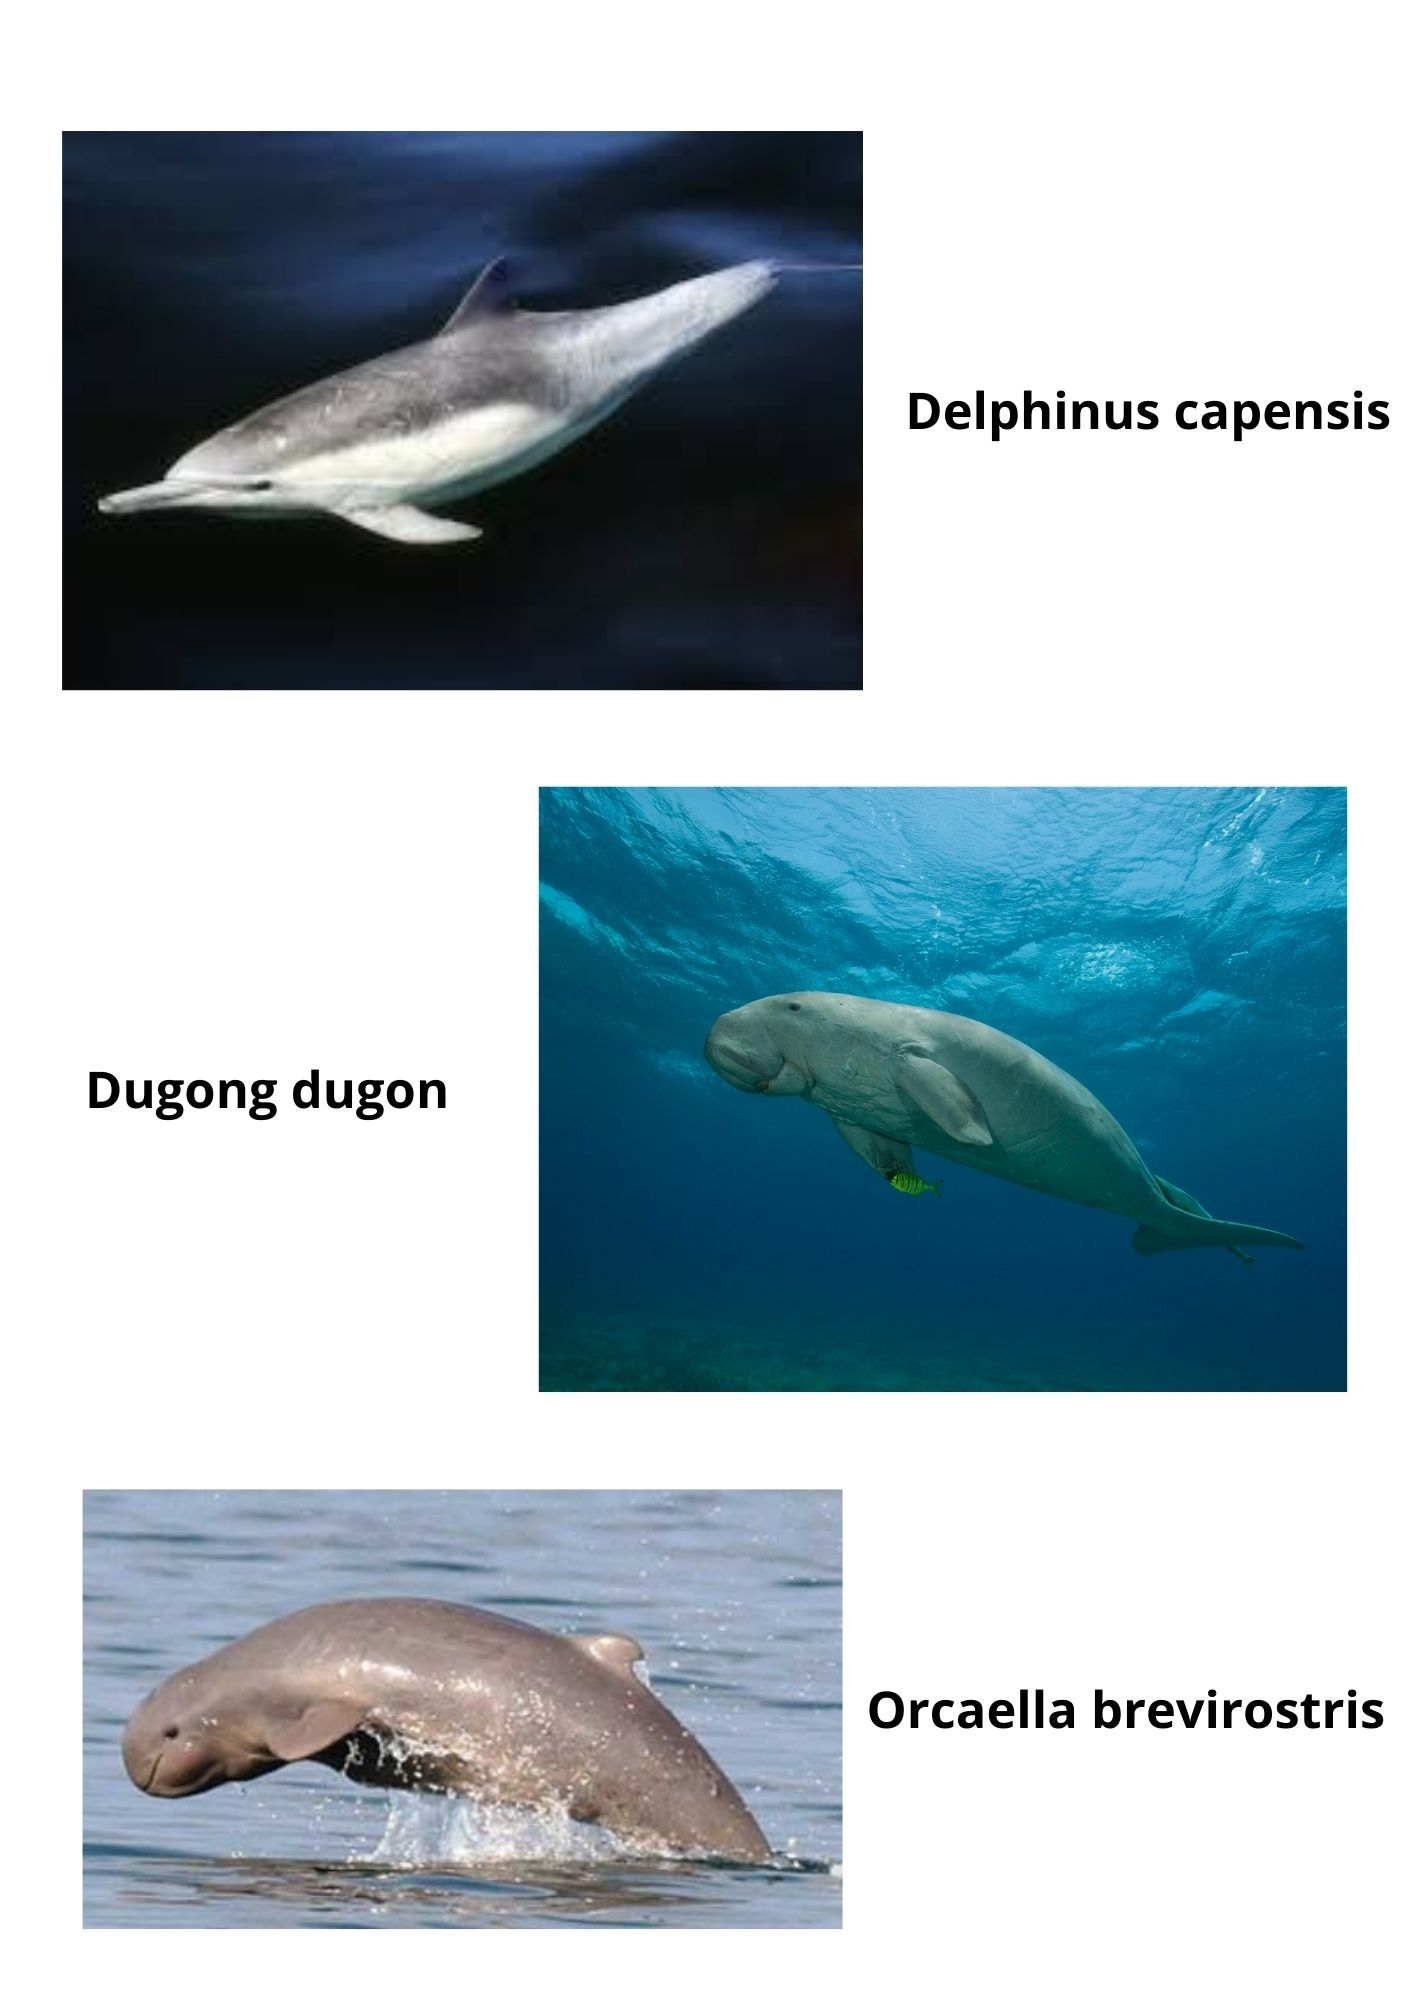

In [6]:
from IPython.display import Image
Image("image.jpg")

In [8]:
data = pd.read_table('/content/data_campur.txt')
data.head()

,sequence,class
0,TTGCGGTTCGACGGCGACGCCCCGAATCCGAGGATGGAGCCGTGGG...,1
1,TTCGTGTTTTAATATTTCTCAAAGGCGAGACCAGTTTTCTGACCTG...,2
2,TTCAGTCCGCTCTGGGCTCCAATCCTGTCCATCCTGCCCCCGAAGC...,1
3,TTCACCATGGCGTTTATGTGAAGAAAATTCATTCTTTGGGAATTTG...,2
4,TTAGACCTCTACCGGGCGCTGAAGGAGCGGGTCGGTGCCTCAGACA...,1


### Melakukan perhitungan k-mer pada nucleotide sequence 

Tantangan dalam klasifikasi data dalam bentuk kata adalah tidak satu pun dari metode jika menggunakan data di atas mdapat diklasifikasikan karena data vektor tersebut tidak memiliki panjang yang seragam, dan panjang seragam adalah persyaratan untuk memasukkan data ke algoritma klasifikasi atau regresi. Jadi dengan metode di atas harus menggunakan hal-hal seperti memotong urutan atau mengisi dengan "n" atau "0" untuk mendapatkan vektor dengan panjang yang seragam.

Urutan nucleotide dan protein dapat dilihat sebagai natural language. Bahasa mengkodekan instruksi serta fungsi untuk molekul yang ditemukan di semua bentuk nucleotide mahluk hidup. Analogi bahasa urutan berlanjut dengan genom sebagai buku, suburutan (gen dan keluarga gen) adalah kalimat dan bab, k-mer dan peptida (motif) adalah kata, dan basa nukleotida dan asam amino adalah secara alfabetis. Karena analogi tersebut tampak sangat tepat, masuk akal bahwa pekerjaan luar biasa yang dilakukan di bidang pemrosesan bahasa alami juga harus diterapkan pada bahasa alami dari sekuens nucleotide dan protein.

Metode yang digunakan di sini adalah pertama-tama mengambil urutan biologis yang panjang dan memecahnya menjadi "words" yang tumpang tindih dengan panjang k-mer. Misalnya, jika menggunakan "words" dengan panjang 6 (heksamer), "ATGCATGCA" menjadi: 'ATGCAT', 'TGCATG', 'GCATGC', 'CATGCA'. Kemudian dipecah menjadi 4 kata heksamer.

Berikut adalah fungsi yang dapat digunakan untuk mengubah urutan (string) apa pun menjadi kata k-mer yang tumpang tindih:

### Pendifinisian fungsi untuk mengumpulkan semua kemungkinan k-mer yang tumpang tindih dengan panjang yang ditentukan dari setiap urutan string. k-mers diterpkan dengan urutan lengkap.

In [9]:
# fungsi untuk mengubah rangkaian string menjadi kata k-mer, ukuran default = 6 (kata heksamer)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

## Ubah urutan data training menjadi k-mer tumpang tindih dengan panjang 6.

In [10]:
data['words'] = data.apply(lambda x: getKmers(x['sequence']), axis=1)
data = data.drop('sequence', axis=1)

### Data squence diubah menjadi huruf kecil, dibagi menjadi semua kata k-mer dengan panjang.

In [11]:
data.head()
# data.to_csv(r'/content/kmers_output.csv', index=False)

,class,words
0,1,"[ttgcgg, tgcggt, gcggtt, cggttc, ggttcg, gttcg..."
1,2,"[ttcgtg, tcgtgt, cgtgtt, gtgttt, tgtttt, gtttt..."
2,1,"[ttcagt, tcagtc, cagtcc, agtccg, gtccgc, tccgc..."
3,2,"[ttcacc, tcacca, caccat, accatg, ccatgg, catgg..."
4,1,"[ttagac, tagacc, agacct, gacctc, acctct, cctct..."


### Scikit-learn digunakan untuk melakukan proses NLP untuk penghitungan k-mer, ubah data k-mer setiap gen menjadi kalimat string yang dapat digunakan oleh count vectorizer. variabel y dibuat untuk menyimpan label kelas.

In [ ]:
data_texts = list(data['words'])
for item in range(len(data_texts)):
    data_texts[item] = ' '.join(data_texts[item])
y_data = data.iloc[:, 0].values                         

In [ ]:
print(data_texts[2])

ttcagt tcagtc cagtcc agtccg gtccgc tccgct ccgctc cgctct gctctg ctctgg tctggg ctgggc tgggct gggctc ggctcc gctcca ctccaa tccaat ccaatc caatcc aatcct atcctg tcctgt cctgtc ctgtcc tgtcca gtccat tccatc ccatcc catcct atcctg tcctgc cctgcc ctgccc tgcccc gccccc cccccg ccccga cccgaa ccgaag cgaagc gaagca aagcag agcagc gcagcc cagccg agccgg gccgga ccggac cggacc ggacct gacctc acctcc cctccg ctccgc tccgca ccgcag cgcagg gcaggc caggct aggctc ggctcc gctccg ctccga tccgag ccgagg cgaggg gagggg aggggc ggggca gggcag ggcagc gcagcg cagcga agcgag gcgagc cgagca gagcag agcagc gcagcg cagcgc agcgcc gcgccc cgccct gccctc ccctca cctcag ctcagc tcagct cagctt agcttg gcttgc cttgct ttgctg tgctgt gctgtt ctgttc tgttca gttcag ttcagg tcagga caggag aggagg ggaggg gagggc agggca gggcag ggcaga gcagat cagatc agatct gatcta atctat tctatc ctatcg tatcgg atcgga tcggag cggagg ggaggg gagggt agggtt gggttc ggttcc gttccc ttccca tcccag cccagg ccaggg cagggg aggggc ggggcc gggcca ggccac gccacg ccacgc cacgcc acgccc cgccca gcccaa cccaag ccaagg caaggg

In [ ]:
y_data

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Terapkan BAG of WORDS menggunakan CountVectorizer menggunakan NLP

In [ ]:
# Membuat model Bag of Words menggunakan CountVectorizer()
# Hal ini sama dengan penghitungan k-mer
# Ukuran n-gram dari 4 sebelumnya ditentukan oleh pengujian
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(data_texts)

In [ ]:
print(X.shape)

(150, 52855)


### Dapat dilihat bahwa dataset yang digunakan adalah seimbang.

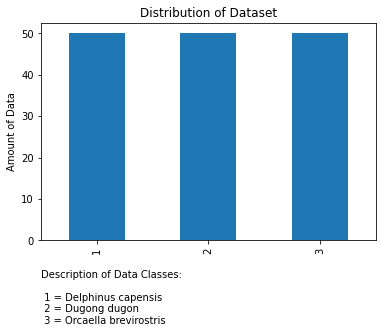

In [ ]:
data['class'].value_counts().sort_index().plot.bar()
plt.xlabel("\nDescription of Data Classes:\n\n 1 = Delphinus capensis \n 2 = Dugong dugon \n 3 = Orcaella brevirostris", horizontalalignment='left',position=(0,25))
plt.ylabel("Amount of Data")
plt.title("Distribution of Dataset")
plt.show()

### Split dataset ke dalam data training dan data uji

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(120, 52855)
(30, 52855)


### Pengklasifikasi dilakukan dengan menggunakan beberapa model atau algoritma machine learning dan deep learning.

Random Forest

Decision Tree

Naïve Bayes

Artificial Neural Network

K-NN	

In [ ]:
### Aplikasikan beberapa algoritma yang akan digunakan dengan import library yang dibutuhkan ###
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Pendefinisian model

# RF
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)

# NB
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

# DT
dt_model = DecisionTreeClassifier(random_state=3, max_depth=42) # (random_state=0, max_depth=2)
dt_model.fit(X_train, y_train)

# mlp
mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
mlp_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = mlp_model.predict(X_test)

### Pengujian akurasi model menggunakan beberapa metrik kinerja model seperti confusion matrix, accuracy, precision, recall dan f1 score. Hasil perolahan skor akurasi menunjukkan bahwa model dapat mempelajari data dengan baik.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  1   2   3
Actual              
1          6   0   1
2          1  10   0
3          0   0  12
accuracy = 0.933 
precision = 0.936 
recall = 0.933 
f1 = 0.933


In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

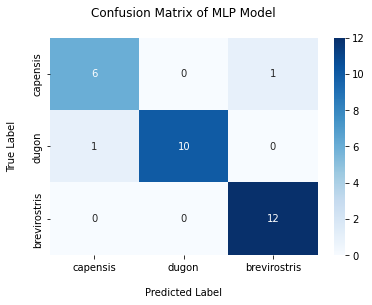

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of MLP Model\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['capensis','dugon', 'brevirostris'])
ax.yaxis.set_ticklabels(['capensis','dugon', 'brevirostris'])

## Display the visualization of the Confusion Matrix.
plt.show()